# Tugas Akhir Belajar Jadi Analis Data Dicoding

## Bangkit Academy 2024: Machine Learning Path

- Luthfi Novra
- Universitas Telkom



## Menyiapkan Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pertanyaan Analisis

Akan dilakukan Analisis Pada Data E-Commerce untuk mengentahui
1. Apa kategori Produk menghasilkan pendapatan terbesar?
2. Bagaimana pendapatan masing-masing seller dari hasil penjualan?
3. Berapa banyak order dan pendapatan secara menyeluruh dalam rentang waktu tertentu?

## Data Wrangling

### Wrangling Data


##### Data Customer

In [2]:
customer_df = pd.read_csv('.\data_ecommerce\customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Data Customer Terdiri dari 5 kolom sebanyak 99441 row

##### Data Order

In [4]:
order_df = pd.read_csv('.\data_ecommerce\orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Data order terdiri dari 8 kolom sebanyak 99441 row

##### Data Order Item

In [6]:
order_item_df = pd.read_csv('.\data_ecommerce\order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Data order item terdiri dari 7 kolom sebanyak 112650 row

##### Data Order Payment

In [8]:
order_payment_df = pd.read_csv('.\data_ecommerce\order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Data order payment terdiri dari 5 kolom sebanyak 103886 row

##### Data Order Review

In [10]:
order_review_df = pd.read_csv('.\data_ecommerce\order_reviews_dataset.csv')
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Data order review terdiri dari 7 kolom sebanyak 99224 row

##### Data Produk

In [12]:
product_df = pd.read_csv('.\data_ecommerce\products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Data produk terdiri dari 9 kolom sebanyak 32951 row

##### Data Translasi Kategori Produk

In [14]:
product_category_df = pd.read_csv('.\data_ecommerce\product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [15]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Data translasi kategori produk terdiri dari 2 kolom sebanyak 71 row

##### Data Seller

In [16]:
seller_df = pd.read_csv('.\data_ecommerce\sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [17]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Data seller terdiri dari 4 kolom sebanyak 3095 row

### Assesing Data

##### Menilai Kualitas Data Customer

In [18]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Perlu adanya perubahan tipe data yang sesuai pada beberapa kolom, seperti kolom city yang seharusnya bertipe data string

In [19]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [20]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


Data Customer sudah baik dengan tidak adanya data yang duplikat ataupun duplikat

In [21]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


##### Menilai Kualitas Data Order

In [22]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Perlu adanya perubahan tipe data yang sesuai pada beberapa kolom, seperti kolom date yang seharusnya bertipe data date

In [23]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [24]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


Data Order Terdapat beberapa nilai null pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date

In [25]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### Menilai Kualitas Data Order Item

In [26]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Perlu adanya penyuasaian tipe data beberapa kolom seperti kolom yang berupa date diubah menjadi tipe data date

In [27]:
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())

Jumlah duplikasi:  0


Data Order Item sudah baik denga tidak adanya data bernilai null ataupun duplikat

In [29]:
order_item_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


##### Menilai Kualitas Data Order Payment

In [30]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Kualitas data order payment sudah baik dengan tidak adanya nilai null ataupun duplikat

In [32]:
order_payment_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Perlu ditelusuri lebih lanjut mengenai data pada kolom order_id dimana terdapat beberapa id yang duplikat

##### Menilai Kualitas Data Order Review

In [33]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Perlu dilakukan perubahan tipe data creation_date menjadi tipe data date

In [34]:
order_review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [35]:
print("Jumlah duplikasi: ", order_review_df.duplicated().sum())

Jumlah duplikasi:  0


Perlu adanya pembersihan data karena terdapat banyaj nilai null pada kolom comment_title dan comment_message

In [36]:
order_review_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Perlu ditelusuri lebih lanjut terkai data review_id yang memiliki frekuensi lebih dari 1

##### Menilai Kualitas Data Produk

In [37]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [38]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [39]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


perlu dilakukan pembersihan data pada beberapa kolom yang terdapat nilai null seperti pada kolom category_name, name_lenght, description_lenght, dst

In [40]:
product_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Perlu dilakukan pembersihan data lebih lanjut

##### Menilai Kualitas Data Translasi Kategori Produk

In [41]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [42]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [43]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


Kualitas data product_category sudah cukup baik dengan tidak adanya nilai null ataupun data duplikat

In [44]:
product_category_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Menilai Kualitas Data Seller

In [45]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [46]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [47]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())

Jumlah duplikasi:  0


Kualitas data seller sudah baik dimana tidak terdapat lagi data null ataupun duplikat

In [48]:
seller_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Cleaning Data

##### Membersihkan Data Customer

In [49]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [50]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data Customer sudah bersih dengan tidak adanya nilai null ataupun duplikat

##### Membersihkan Data Order

In [51]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [52]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


data-data yang berkaitan dengan tanggal perlu dikonversi ke tipe data date

In [53]:
datetime_order = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_order:
    order_df[column] = pd.to_datetime(order_df[column])

In [54]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [55]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Data pada kolom2 `datetime_order` sudah dikonversi menjadi tipe data date

In [56]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [57]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [58]:
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Mengganti data null pada `order_approved_at` dengan data `order_purchase_timestamp` karena selisih waktu antara order_purchase ke order_aprroved biasanya hanya beberapa jam

In [59]:
order_df['order_approved_at'].fillna(order_df['order_purchase_timestamp'], inplace=True)

In [60]:
# Data order approved at yang tidak bernilai null tidak diganti nilainya
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [61]:
# Salah satu data yang kolom order_approved_at sebelumnya null telah berisi nilai order_purchase_timestamp
order_df.iloc[1130]

order_id                         00b1cb0320190ca0daa2c88b35206009
customer_id                      3532ba38a3fd242259a514ac2b6ae6b6
order_status                                             canceled
order_purchase_timestamp                      2018-08-28 15:26:39
order_approved_at                             2018-08-28 15:26:39
order_delivered_carrier_date                                  NaT
order_delivered_customer_date                                 NaT
order_estimated_delivery_date                 2018-09-12 00:00:00
Name: 1130, dtype: object

In [62]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terlihat bahwasanya data null pada `order_purchase_timestamp` sudah tidak ada. Dan data yang null sudah diganti dengan nilai data data_approved_at

In [63]:
order_df[order_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Untuk data `order_delivered_customer_date` yang bernilai null dapat diisi dengan data `order_estimated_delivery_date`

In [64]:
order_df['order_delivered_customer_date'].fillna(order_df['order_estimated_delivery_date'], inplace=True)

In [65]:
# Data order_delivered_customer_date yang tidak bernilai null tidak diganti nilainya
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [66]:
# Salah satu data yang kolom order_delivered_customer_date sebelumnya null telah berisi nilai order_purchase_timestamp
order_df.iloc[6]

order_id                         136cce7faa42fdb2cefd53fdc79a6098
customer_id                      ed0271e0b7da060a393796590e7b737a
order_status                                             invoiced
order_purchase_timestamp                      2017-04-11 12:22:08
order_approved_at                             2017-04-13 13:25:17
order_delivered_carrier_date                                  NaT
order_delivered_customer_date                 2017-05-09 00:00:00
order_estimated_delivery_date                 2017-05-09 00:00:00
Name: 6, dtype: object

In [67]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64

Data pada kolom `order_delivered_customer_date` sudah tidak ada lagi yang bernilai null

In [68]:
order_df[order_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,2017-05-09,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,2018-08-21,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,2017-10-03,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,2017-12-05,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,2016-12-09,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,NaT,2018-10-01,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,2018-02-06,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,NaT,2018-09-27,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,2017-09-15,2017-09-15


Mengisi nilai kolom `order_delivered_carrier_date` yang bernilai null dengan rata2 selisih antara data yang tidak null pada kolom `order_delivered_carrier_date` dengan kolom `order_approved_at`

In [69]:
average_time_difference = (order_df['order_delivered_carrier_date'] - order_df['order_approved_at']).mean()

order_df['order_delivered_carrier_date'].fillna(order_df['order_approved_at'] + average_time_difference, inplace=True)

In [70]:
# Data order_delivered_carrier_date yang tidak bernilai null tidak diganti nilainya
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [71]:
# Salah satu data yang kolom order_delivered_carrier_date sebelumnya null telah berisi nilai
order_df.iloc[6]

order_id                         136cce7faa42fdb2cefd53fdc79a6098
customer_id                      ed0271e0b7da060a393796590e7b737a
order_status                                             invoiced
order_purchase_timestamp                      2017-04-11 12:22:08
order_approved_at                             2017-04-13 13:25:17
order_delivered_carrier_date        2017-04-16 08:44:56.331800774
order_delivered_customer_date                 2017-05-09 00:00:00
order_estimated_delivery_date                 2017-05-09 00:00:00
Name: 6, dtype: object

In [72]:
order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Sudah tidak ada lagi kolom data yang bernilai null

In [73]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


Juga tidak ada lagi data order yang duplikat

In [74]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 14:27:00.496521728,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:46:19.331800774,2016-09-30 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:43:36,2017-09-22 21:28:06,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 17:18:57,2018-02-01 19:34:49,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 09:55:00,2018-05-15 17:51:03,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-20 12:49:57.331800774,2018-11-12 00:00:00,2018-11-12 00:00:00


##### Membersihkan Data Order Item

In [75]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [76]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Mengubah tipe data kolom shipping_limit_date menjadi tipe data date

In [77]:
datetime_order_item = ['shipping_limit_date']

for column in datetime_order_item:
    order_item_df[column] = pd.to_datetime(order_item_df[column])

In [78]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Data kolom shipping_limit_date sudah menjadi tipe data datetime

In [79]:
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Sudah tidak ada data order_item yang bernilai null

In [80]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())

Jumlah duplikasi:  0


Juga tidak ada data yang duplikat

In [81]:
order_item_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [82]:
# Melihat data order_id dengan frekuensi terbanyak
top_order_id = '8272b63d03f5f79c56e9e4120aec44ef'
top_freq_order = order_item_df[order_item_df['order_id'] == top_order_id]

top_freq_order.head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


Berdasarkan data tersebut, diasumsikan tabel order_item merupakan composite key dengan order_item_id. Hal ini mungkin terjadi karena data dinormalisasi dalam bentuk sql pada awalnya. Sehingga walau satu order_id yang sama banyak muncul, hal tersebut merepresentasikan seluruh item yang diorder dalam orderan tsb.

##### Membersihkan Data Order Payment

In [83]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [84]:
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [85]:
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tidak terdapat data bernilai null

In [86]:
print("Jumlah duplikasi: ", order_payment_df.duplicated().sum())

Jumlah duplikasi:  0


Juga tidak terdapat data yang duplikat

In [87]:
order_payment_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Menelusuri data order_id dengan freq terbanyak

In [88]:
# Melihat data order_id dengan frekuensi terbanyak
top_order_id = 'fa65dad1b0e818e3ccc5cb0e39231352'
top_order_id_payment = order_payment_df[order_payment_df['order_id'] == top_order_id]

top_order_id_payment.head(20)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


Terlihat bahwasanya order_id yang sama bukan karena kesalahan, namun meruppakan representasi pembayaran bertahap (cicilan) suatu order

##### Membersihkan Data Order Review

In [89]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [90]:
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Kolom `review_creation_date` dan `review_answer_timestamp` perlu diubah menjadi tipe data date

In [91]:
datetime_order = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_order:
    order_review_df[column] = pd.to_datetime(order_review_df[column])

In [92]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Data kolom `review_creation_date` dan `review_answer_timestamp` sudah menjadi tipe data datetime

In [93]:
order_review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat lumayan banyak data review_comment_title dan message yang bernilai null

In [94]:
order_review_df[order_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


Berdasarkan data, mungkin saja bisa diasumsikan data message dan title bukan merupakan field yang wajib diisi customer, sehingga data pada colom tersebut bisa diganti dengan nilai 'no_comment' ataupun 'no_title'. Hal ini dilakukan karena customer diasumsikan hanya melakukan input rating

In [95]:
# Mengisi nilai null pada comment_title dengan data no_title
order_review_df['review_comment_title'].fillna('no_title', inplace=True)

In [96]:
# Mengisi nilai null pada comment_message dengan data no_message
order_review_df['review_comment_message'].fillna('no_message', inplace=True)

In [97]:
order_review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Sudah tidak terdapat nilai null pada data order_review

In [98]:
print("Jumlah duplikasi: ", order_review_df.duplicated().sum())

Jumlah duplikasi:  0


Juga sudah tidak terdapat data duplikat

In [99]:
order_review_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,no_title,no_message,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [100]:
# Menelusuri review yang memiliki review_id dengan freq lebih dari 1
# Melihat data order_id dengan frekuensi terbanyak
top_review_id = '7b606b0d57b078384f0b58eac1d41d78'
top_freq_review = order_review_df[order_review_df['review_id'] == top_review_id]

top_freq_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
7500,7b606b0d57b078384f0b58eac1d41d78,f3028a8f41ea1ee2b461420913663f97,5,no_title,no_message,2017-02-15,2017-02-21 23:30:22
59859,7b606b0d57b078384f0b58eac1d41d78,2deb17060fc1ce18a85eba953ddcdeaf,5,no_title,no_message,2017-02-15,2017-02-21 23:30:22
61069,7b606b0d57b078384f0b58eac1d41d78,2f8f31eb2f7b6572836d662a6625c8e4,5,no_title,no_message,2017-02-15,2017-02-21 23:30:22


Berdasarkan data tersebut terlihat bahwa review_id dengan id yang sama akan berasosiasi dengan order_id yang berbeda. hal ini dianggap wajar, diasumsikan satu review itu diasosiasikan dengan lebih dari satu order sekaligus

##### Membersihkan Data Produk

In [101]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [102]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [103]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat beberapa 610 produk yang bernilai null kategori, panjang_nama, panjang_deskripsi, dan product_photos_qty

In [104]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Terlihat bahwasanya data nama beberapa produk beserta data deskripsinya bernilai null

In [105]:
# Melihat data kategori produk
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [106]:
product_category_df['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

Nama kategori pada data produk dapat direplace dengan data nama dalam bahasa inggris yang terdapat pada data product_category. Jika tidak terdapat maka dapat diisi dengan no_data

In [107]:
# Join product_df dengan product_category_name
product_df = product_df.merge(product_category_df, on='product_category_name', how='left')

# Ganti nilai pada product_category_name dengan nama dalam bahasa inggris ketika terdapat data dalam bahasa inggris
product_df.loc[product_df['product_category_name_english'].notna(), 'product_category_name'] = product_df['product_category_name_english']

product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [108]:
product_df.drop(columns=['product_category_name_english'], inplace=True)

In [109]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [110]:
#data pada `product_category_name`, `product_name_length`, `product_description_length`, `product_photos_qty` yang bernilai null dapat diisi dengan nilai no_data
columns_to_fill = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
product_df[columns_to_fill] =product_df[columns_to_fill].fillna("no_data")

In [111]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [112]:
# Menelusuri data null pada product_weight_g
product_df[product_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,baby,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,no_data,no_data,no_data,no_data,NaN,NaN,NaN,NaN


Terlihat bahwa kedua data yang null nilai weightnya itu hanya berupa 2 row. Data 8578 mungkin bisa diabaikan dengan diisi nilai 0.
sedangkan data 18851 bisa langsung di drop karena semua kolomnya bernilai null

In [113]:
# data row 18851 tidak memiliki data apapun sehingga dapat di drop
product_df.drop(index=18851, inplace=True)

# data row 8578 bisa diisi nilai 0
columns_to_fill = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
product_df[columns_to_fill] =product_df[columns_to_fill].fillna("0")

In [114]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Sudah tidak ada lagi data yang null

In [115]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


Sudah tidak ada data yang duplikat

In [116]:
product_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32950,32950,32950.0,32950,32950.0,32950.0,32950.0,32950.0,32950.0
unique,32950,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table,60.0,no_data,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,609,16489.0,2084.0,5520.0,2548.0,3718.0


Data sudah baik mulai dari id produk yang unik (freq nya = 1) dan tidak ada lagi data yang null

##### Membersihkan Data Kategori Translasi

data tidak perlu lagi dibersihkan karena sudah diproses untuk digunakan pada saat pembersihan data produk

##### Membersihkan Data Seller

In [117]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [118]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak terdapat data yang null pada data seller

In [119]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang null pada data seller

In [120]:
seller_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Data sudah baik dengan seller_id yang unik dan tidak adanya data yg null

## Exploratory Data Analysis

### Eksplorasi Data `customer_df`

In [121]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Melihat Persebaran Customer Berdasakan Kota

In [122]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(50)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
santos                     713
goiania                    692
sao jose dos campos        691
fortaleza                  654
sorocaba                   633
recife                     613
florianopolis              570
jundiai                    565
ribeirao preto             510
belem                      447
nova iguacu                442
barueri                    433
juiz de fora               427
contagem                   426
sao goncalo                409
mogi das cruzes            383
vitoria                    380
uberlandia                 374
piracicaba               

Terlihat bahwa customer paling banyak berasal dari sao paolo diikuti oleh rio janeiro

In [123]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(50)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Berdasarkan state customer terbanyak berasal dari SP dan paling sedikit berasal dari RR

### Eksplorasi Data `order_df`

In [124]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 14:27:00.496521728,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:46:19.331800774,2016-09-30 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:43:36,2017-09-22 21:28:06,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 17:18:57,2018-02-01 19:34:49,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 09:55:00,2018-05-15 17:51:03,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-20 12:49:57.331800774,2018-11-12 00:00:00,2018-11-12 00:00:00


In [125]:
order_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Berdasarkan status, sebagian besar data sudah delivered, sedangkan terdapat 1107 data yang masih dikirimkan, dan 625 data yang dicancel

<Axes: >

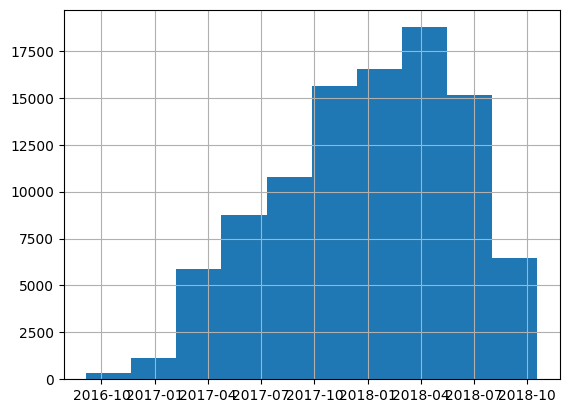

In [126]:
#Melihat Persebaran Waktu Pembelian order

order_df.order_purchase_timestamp.hist()

Sebagian besar order terjadi pada rentang waktu tahun 2018 Bulan April

<Axes: >

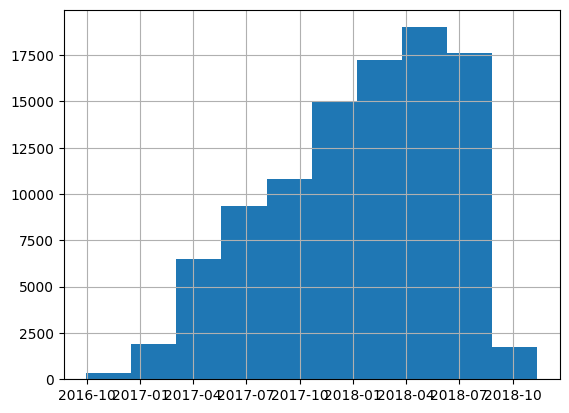

In [127]:
#Melihat Persebaran Waktu Order sampai ke pengguna

order_df.order_delivered_customer_date.hist()

Sejalan dengan waktu pembelian, sebagian besar order sampai ke customer pada rentang waktu 2018-04 sampai 2018-07

In [128]:
# Mencari waktu delivery order
order_df['delivery_time'] = order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']

# Mengubah waktu delivery menjadi satuan hari
order_df['delivery_time'] = order_df['delivery_time'].dt.days

order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


<Axes: >

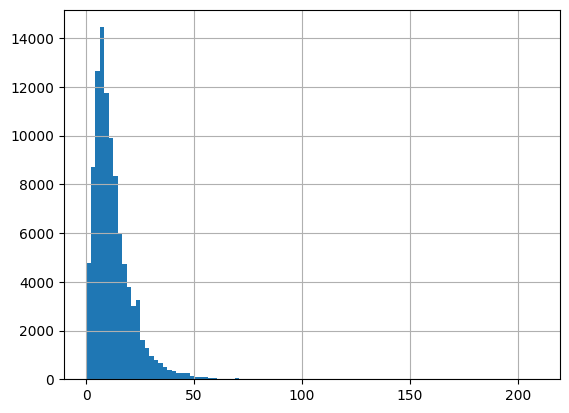

In [129]:
order_df.delivery_time.hist(bins=100)

In [130]:
order_df.delivery_time.value_counts().head(30)

delivery_time
7     7678
6     6816
8     6765
9     6081
5     5819
10    5657
11    5164
4     4835
12    4745
13    4461
14    3886
3     3859
15    3258
2     3178
16    2712
17    2438
18    2286
19    1933
20    1854
21    1654
1     1573
22    1372
23    1217
24    1067
25     970
26     853
27     771
28     711
29     559
30     521
Name: count, dtype: int64

Terlihat bahwa waktu pengiriman paling banyak selama 7 hari

### Eksplorasi `order_df` dan `customer_df`

In [131]:
orders_customers_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [132]:
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  99441 non-null  int64         
 9   customer_unique_id             99441 non-null  object        
 10  customer_zip_code_prefix       99441 non-null  int64         
 11  customer_city  

In [133]:
# melihat persebaran order berdasarkan kota
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(50)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
santos                     713
goiania                    692
sao jose dos campos        691
fortaleza                  654
sorocaba                   633
recife                     613
florianopolis              570
jundiai                    565
ribeirao preto             510
belem                      447
nova iguacu                442
barueri                    433
juiz de fora               427
contagem                   426
sao goncalo                409
mogi das cruzes            383
vitoria                    380
uberlandia                 374
piracicaba               

Data jumlah kota sama persis dengan data customer. Hal ini dapat terjadi karena setiap customer_id hanya berasosiasi dengan satu order_id sehingga satu customer_id dianggap hanya melakukan order satu kali

### Eksplorasi Data `product_df`

In [134]:
product_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32950,32950,32950.0,32950,32950.0,32950.0,32950.0,32950.0,32950.0
unique,32950,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table,60.0,no_data,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,609,16489.0,2084.0,5520.0,2548.0,3718.0


In [135]:
# Melihat persebaran kategori produk yang ada
product_df.product_category_name.value_counts().head(50)

product_category_name
bed_bath_table                             3029
sports_leisure                             2867
furniture_decor                            2657
health_beauty                              2444
housewares                                 2335
auto                                       1900
computers_accessories                      1639
toys                                       1411
watches_gifts                              1329
telephony                                  1134
baby                                        919
perfumery                                   868
fashion_bags_accessories                    849
stationery                                  849
cool_stuff                                  789
garden_tools                                753
pet_shop                                    719
no_data                                     609
electronics                                 517
construction_tools_construction             400
home_appliances   

Kategori produk terbanyak yaitu `bed_bath_table` sebanyak 3029 produk

### Eksplorasi Data `sellers_df`

In [136]:
seller_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [137]:
# Melihat persebaran seller berdasarkan kota
seller_df.seller_city.value_counts().head(50)

seller_city
sao paulo                694
curitiba                 127
rio de janeiro            96
belo horizonte            68
ribeirao preto            52
guarulhos                 50
ibitinga                  49
santo andre               45
campinas                  41
maringa                   40
sao jose do rio preto     33
sao bernardo do campo     32
sorocaba                  32
osasco                    32
porto alegre              28
brasilia                  28
londrina                  26
goiania                   23
joinville                 22
blumenau                  21
franca                    20
sao caetano do sul        20
florianopolis             18
caxias do sul             18
sao jose dos campos       18
limeira                   17
santos                    16
mogi das cruzes           15
marilia                   15
jundiai                   14
cascavel                  14
bauru                     14
barueri                   13
sao carlos                13
ma

Terlihat bahwsanya sebagian besar seller berada di Sao Paolo

### Eksplorasi Data `order_item_df`

In [138]:
order_item_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [139]:
order_item_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [140]:
# Seller dengan penjualan terbanyak
order_item_df.seller_id.value_counts().head(50)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
4869f7a5dfa277a7dca6462dcf3b52b2    1156
3d871de0142ce09b7081e2b9d1733cb1    1147
8b321bb669392f5163d04c59e235e066    1018
cca3071e3e9bb7d12640c9fbe2301306     830
620c87c171fb2a6dd6e8bb4dec959fc6     798
a1043bafd471dff536d0c462352beb48     770
e9779976487b77c6d4ac45f75ec7afe9     750
f8db351d8c4c4c22c6835c19a46f01b0     724
d2374cbcbb3ca4ab1086534108cc3ab7     631
391fc6631aebcf3004804e51b40bcf1e     613
fa1c13f2614d7b5c4749cbc52fecda94     586
7d13fca15225358621be4086e1eb0964     578
128639473a139ac0f3e5f5ade55873a5     560
1835b56ce799e6a4dc4eddc053f04066     558
46dc3b

Seller dengan penjualan terbanyak yaitu seller dengan id 6560211a19b47992c3666cc44a7e94c0 sebanyak

In [174]:
# Pendapatan penjualan masing-masing seller
pendapatan_seller_df = order_item_df.groupby('seller_id')['price'].sum().reset_index()

freq_seller_df = order_item_df.groupby(['seller_id']).size().reset_index(name='order_freq')

pendapatan_seller_df = pendapatan_seller_df.merge(freq_seller_df, on='seller_id')

pendapatan_seller_df.rename(columns={'price': 'revenue'}, inplace=True)

pendapatan_seller_df.sort_values(by='revenue', ascending=False)

,seller_id,revenue,order_freq
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,1156
1013,53243585a1d6dc2643021fd1853d8905,222776.05,410
881,4a3ca9315b744ce9f8e9374361493884,200472.92,1987
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03,586
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89,1364
...,...,...,...
627,34aefe746cd81b7f3b23253ea28bef39,8.00,1
1370,702835e4b785b67a084280efca355756,7.60,1
373,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,1
1465,77128dec4bec4878c37ab7d6169d6f26,6.50,1


Sudah didapatkan data seller dengan pendapatan terbanyak dan jumlah order masing-masing seller

### Eksplorasi Data `order_item_df`, `product_df` dan `order_df`

In [142]:
order_item_product_df = pd.merge(
    left=order_item_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

order_item_product_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112633,112633.0,112633,112633.0,112633.0,112633.0,112633.0,112633.0
unique,98666,NaN,32951,3095,NaN,NaN,NaN,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,bed_bath_table,59.0,no_data,1.0,200.0,16.0,10.0,20.0
freq,21,NaN,527,2033,NaN,NaN,NaN,11115,8322.0,1586,56028.0,6778.0,17603.0,9826.0,12095.0
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
order_item_product_df = pd.merge(
    left=order_item_product_df,
    right = order_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

order_item_product_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112633,112633.0,112633,...,112633.0,112633.0,112650,112650,112650,112650,112650,112650,112650,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN,74,67.0,2961,...,103.0,96.0,98666,7,NaN,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,bed_bath_table,59.0,no_data,...,10.0,20.0,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN,11115,8322.0,1586,...,9826.0,12095.0,21,110197,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-01 00:09:48.464376576,2018-01-01 10:44:28.697612544,2018-01-04 07:09:20.582957568,2018-01-13 18:08:02.248930048,2018-01-24 20:12:15.531291392,12.286107
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 09:28:17.331800774,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2017-09-13 19:17:04,2017-09-14 02:57:55.249999872,2017-09-15 21:42:24.750000128,2017-09-25 20:13:49.500000,2017-10-05 00:00:00,6.000000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-19 23:02:16,2018-01-20 12:50:58,2018-01-23 23:42:08.500000,2018-02-02 15:18:04.500000,2018-02-16 00:00:00,10.000000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-05-04 17:30:36.750000128,2018-05-05 03:06:27.500000,2018-05-08 11:51:00,2018-05-15 17:36:15.500000,2018-05-28 00:00:00,16.000000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000


In [175]:
# Mendapatkan Data Produk dengan kategori terjual terbanyak
pendapatan_kategori_df = order_item_product_df.groupby('product_category_name')['price'].sum().reset_index()

# Mendapatkan jumlah produk terjual masing-masing kategori
pendapatan_kategori_df_count = order_item_product_df['product_category_name'].value_counts().reset_index()
pendapatan_kategori_df_count.columns = ['product_category_name', 'order_freq']

pendapatan_kategori_df.sort_values(by='price', ascending=False)

,product_category_name,price
43,health_beauty,1258681.34
73,watches_gifts,1205005.68
7,bed_bath_table,1036988.68
68,sports_leisure,988048.97
15,computers_accessories,911954.32
...,...,...
35,flowers,1110.04
46,home_comfort_2,760.27
11,cds_dvds_musicals,730.00
29,fashion_childrens_clothes,569.85


In [176]:
pendapatan_kategori_df_count.sort_values(by='order_freq', ascending=False)

,product_category_name,order_freq
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
69,cds_dvds_musicals,14
70,la_cuisine,14
71,pc_gamer,9
72,fashion_childrens_clothes,8


In [177]:
pendapatan_kategori_df = pendapatan_kategori_df.merge(pendapatan_kategori_df_count, on='product_category_name')

pendapatan_kategori_df.rename(columns={'price': 'revenue'}, inplace=True)

pendapatan_kategori_df.sort_values(by='revenue', ascending=False)

,product_category_name,revenue,order_freq
43,health_beauty,1258681.34,9670
73,watches_gifts,1205005.68,5991
7,bed_bath_table,1036988.68,11115
68,sports_leisure,988048.97,8641
15,computers_accessories,911954.32,7827
...,...,...,...
35,flowers,1110.04,33
46,home_comfort_2,760.27,30
11,cds_dvds_musicals,730.00,14
29,fashion_childrens_clothes,569.85,8


Terlihat bahwasanya produk dengan pendapatan terbanyak merupakan produk health_beauty diikuti produk watches_gifts dan bed_bath_table

In [199]:
# Mendapptka nilai pendapatan berdasarkan waktu dan bulan
order_item_product_df['year'] = order_item_product_df['order_purchase_timestamp'].dt.year
order_item_product_df['month'] = order_item_product_df['order_purchase_timestamp'].dt.month

monthly_price_df = order_item_product_df.groupby(['year', 'month'])['price'].sum().reset_index()
monthly_price_df.columns = ['year', 'month', 'revenue']

# Mendapatkan Jumlah order pada masing-masing bulan/tahun
freq_df = order_item_product_df.groupby(['year', 'month']).size().reset_index(name='order_freq')

summary_revenue_df = monthly_price_df.merge(freq_df, on=['year', 'month'])
summary_revenue_df.head(50)

,year,month,revenue,order_freq
0,2016,9,267.36,6
1,2016,10,49507.66,363
2,2016,12,10.90,1
3,2017,1,120312.87,955
4,2017,2,247303.02,1951
5,2017,3,374344.30,3000
6,2017,4,359927.23,2684
7,2017,5,506071.14,4136
8,2017,6,433038.60,3583
9,2017,7,498031.48,4519


 Sudah didapatkan data pendapatan serta jumlah order dari 2016-09 sampai 2018-09

### Eksplorasi data `order_item_df` dan `review_df`

In [ ]:
order_item_review_df = pd.merge(
    left=order_item_df,
    right=order_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

order_item_review_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,no_title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,no_title,no_message,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,no_title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,no_title,no_message,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,no_title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,5e4e50af3b7960b7a10d86ec869509e8,4.0,no_title,no_message,2017-05-23,2017-05-24 19:00:09
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,0381de7572d99d75230ce91207807265,4.0,no_title,no_message,2017-12-19,2017-12-29 02:40:12
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,f0733ebeb51b637dfdc953983c867b89,5.0,no_title,no_message,2018-07-10,2018-07-11 20:14:25
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,67b1ab8f3ec19d5a90f153f21757d3a1,1.0,no_title,Na descrição do produto quando fui efetuar a c...,2018-03-30,2018-04-02 00:52:01
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,5c0b7e34ed85ec659bb064902d878e7a,4.0,no_title,no_message,2018-07-05,2018-07-05 23:17:04


In [ ]:
order_item_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 113314 non-null  object        
 1   order_item_id            113314 non-null  int64         
 2   product_id               113314 non-null  object        
 3   seller_id                113314 non-null  object        
 4   shipping_limit_date      113314 non-null  datetime64[ns]
 5   price                    113314 non-null  float64       
 6   freight_value            113314 non-null  float64       
 7   review_id                112372 non-null  object        
 8   review_score             112372 non-null  float64       
 9   review_comment_title     112372 non-null  object        
 10  review_comment_message   112372 non-null  object        
 11  review_creation_date     112372 non-null  datetime64[ns]
 12  review_answer_ti

In [ ]:
# Mendapatkan rata-rata rating dari keseluruhan order berdasarkan seller
seller_avg_rating_df = order_item_review_df.groupby('seller_id')['review_score'].mean().reset_index()

seller_avg_rating_df.sort_values(by='review_score', ascending=False)

,seller_id,review_score
339,1cd9e0cc1839d55516843def5600816d,5.0
1940,9fbd5666d8618fa571c4230fafa09bd6,5.0
2563,d3891911c2feae53c52fea2bd14054e5,5.0
1370,702835e4b785b67a084280efca355756,5.0
1966,a20d8058c866dbaeca014d2cd20ac62e,5.0
...,...,...
394,20f0aeea30bc3b8c4420be8ced4226c0,NaN
657,3820c6537b3853be1a0687d5a60807ec,NaN
764,400f221ab83037c0ea78f1267da9624d,NaN
1583,80ceebb4ee9b31afb6c6a916a574a1e2,NaN


In [ ]:
# Menyimpan banyak hasil penjualan seller
seller_counts = order_item_review_df['seller_id'].value_counts()

seller_counts['1cd9e0cc1839d55516843def5600816d']

5

In [ ]:
seller_counts.head(10)

seller_id
6560211a19b47992c3666cc44a7e94c0    2039
4a3ca9315b744ce9f8e9374361493884    2009
1f50f920176fa81dab994f9023523100    1940
cc419e0650a3c5ba77189a1882b7556a    1819
da8622b14eb17ae2831f4ac5b9dab84a    1574
955fee9216a65b617aa5c0531780ce60    1501
1025f0e2d44d7041d6cf58b6550e0bfa    1443
7c67e1448b00f6e969d365cea6b010ab    1375
ea8482cd71df3c1969d7b9473ff13abc    1204
7a67c85e85bb2ce8582c35f2203ad736    1175
Name: count, dtype: int64

In [ ]:
seller_avg_rating_df.loc[seller_avg_rating_df['seller_id'] == '6560211a19b47992c3666cc44a7e94c0']

,seller_id,review_score
1235,6560211a19b47992c3666cc44a7e94c0,3.909406


Berdasarkan rating terlihat bahwasanya seler terbanyak adalah seller 1cd9e0cc1839d55516843def5600816d dengan rata-rata rating 5.0.

Namun hal ini perlu tidak dapat menjadi acuan melihat penjualan dari sellr tersebut hanya sebesar 5 penjualan. Hal tersebut dapat menyebabkan sampling bias karena data penjualan seller tersebut sedikit

Bandingkan dengan seller 6560211a19b47992c3666cc44a7e94c0 yang mendapatkan penjualan sebanyak 2039 penjualan namun hanya mendapatkan rata-rata rating 3.9
Oleh karena itu data ini tidak menggambarkan keselurahan data yang ada

### Hasil Utama Eksplorasi

N.B Diasumsikan Data Revenue dalam Mata Uang Brazil Yaitu `Brazilian Reais (BRL)`

##### Data Pendapatan masing-masing seller serta jumlah penjualan

In [181]:
pendapatan_seller_df.sort_values(by='revenue', ascending=False)

,seller_id,revenue,order_freq
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,1156
1013,53243585a1d6dc2643021fd1853d8905,222776.05,410
881,4a3ca9315b744ce9f8e9374361493884,200472.92,1987
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03,586
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89,1364
...,...,...,...
627,34aefe746cd81b7f3b23253ea28bef39,8.00,1
1370,702835e4b785b67a084280efca355756,7.60,1
373,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,1
1465,77128dec4bec4878c37ab7d6169d6f26,6.50,1


Berdasarkan data tersebut diketahui bahwasanya seller `4869f7a5dfa277a7dca6462dcf3b52b2` merupakan seller dengan pendapatan terbesar yaitu sebesar `229472.63 (BRL)` dengan jumlah order sebanyak `1156`

##### Data Penjualan Masing-masing Kategori Produk

In [180]:
pendapatan_kategori_df.sort_values(by='revenue', ascending=False)

,product_category_name,revenue,order_freq
43,health_beauty,1258681.34,9670
73,watches_gifts,1205005.68,5991
7,bed_bath_table,1036988.68,11115
68,sports_leisure,988048.97,8641
15,computers_accessories,911954.32,7827
...,...,...,...
35,flowers,1110.04,33
46,home_comfort_2,760.27,30
11,cds_dvds_musicals,730.00,14
29,fashion_childrens_clothes,569.85,8


Berdasarkan data tersebut didapatkan bahwasanya produk `health_beauty` merupakan kategori produk yang menghasilkan pendapatan terbesar yaitu sebesar `1258681.34 (BRL)` dengan jumlah order sebanyak `9670`

##### Data Penjualan Keseluruhan Berdasarkan waktu

In [200]:
summary_revenue_df.head(50)

,year,month,revenue,order_freq
0,2016,9,267.36,6
1,2016,10,49507.66,363
2,2016,12,10.90,1
3,2017,1,120312.87,955
4,2017,2,247303.02,1951
5,2017,3,374344.30,3000
6,2017,4,359927.23,2684
7,2017,5,506071.14,4136
8,2017,6,433038.60,3583
9,2017,7,498031.48,4519


Berdasarkan data tersebut terlihat bahwasanya penghasilan terbesar terjadi pada bulan `November - 2017` dengan pendapatan sebanyak `1010271.37 (BRL)` dengan jumlah order sebanyak `8665`

##### Selain itu juga terdapat hasil eksplorasi lain seperti data review/rating, data customer_city dan-lain-lain

## Explanatory dan Data Visualization

Akan Dilakukan Visualisasi untuk menjawab tiga pertanyaan Analisis Diawal

### 1. Pendapatan dan Banyak Order Secara Keseluruhan

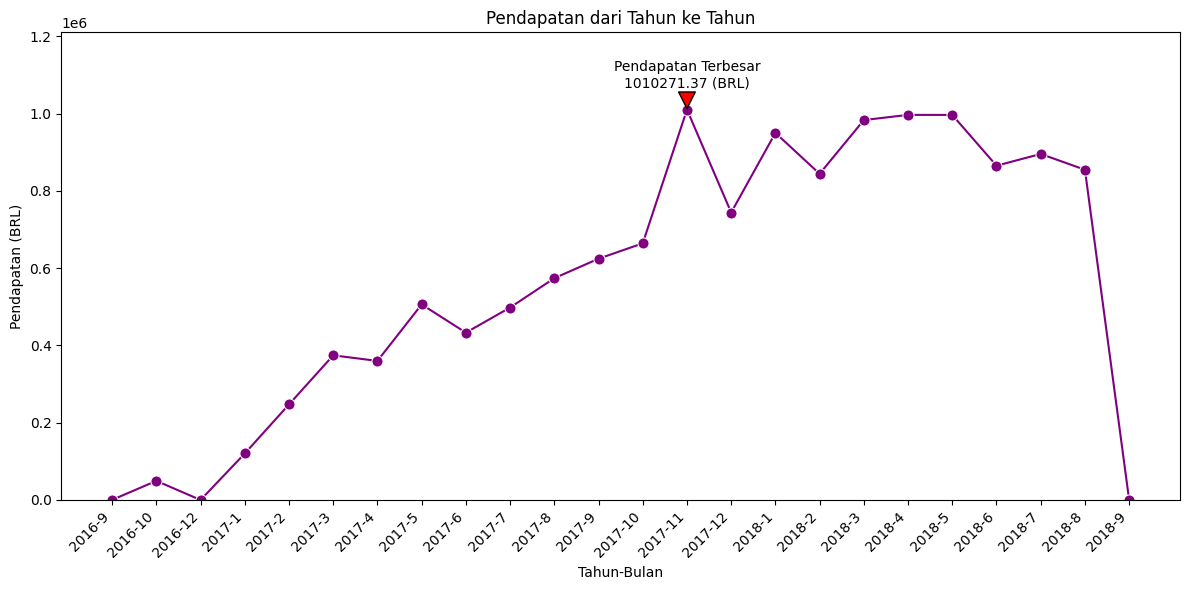

In [201]:
# Line Chart Pendapatan dan Banyak Order dari Tahun ke Tahun
summary_revenue_df['year_month'] = summary_revenue_df['year'].astype(str) + '-' + summary_revenue_df['month'].astype(str)

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='year_month', y='revenue', data=summary_revenue_df, marker='o', markersize=8, errorbar=None, color='purple')

# mendapatkan index pendapatan terbesar
max_revenue_index = summary_revenue_df['revenue'].idxmax()

# Melakukan anotasi pada pendapatan terbesar
max_revenue = summary_revenue_df.loc[max_revenue_index, 'revenue']
max_year_month = summary_revenue_df.loc[max_revenue_index, 'year_month']

# Mengatur Posisi Anotasi
annotation_y_position = max_revenue + 50000
annotation_x_position = max_year_month

# Annotasi Pendaptan terbesar
ax.annotate(f'Pendapatan Terbesar\n{max_revenue:.2f} (BRL)', xy=(max_year_month, max_revenue), xytext=(annotation_x_position, annotation_y_position),
            arrowprops=dict(facecolor='red', shrink=0.05),
            ha='center', va='bottom'
            )

# Set Label Chart
plt.title('Pendapatan dari Tahun ke Tahun')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Pendapatan (BRL)')

plt.xticks(rotation=45, ha='right')

# Mengubah limit border chart
ax.set_ylim(0, max_revenue + 200000) 

plt.tight_layout()
plt.show()

Berdasarkan Line Chart tersebut terlihat bahwasanya pendapatan order meningkat dari tahun ke tahun dan puncaknya terjadi pada `Tahun 2017 Bulan November` dan kemudian pendapatan `fluktuatif di nilai (6 s.d 9)*10^6 (BRL)` Mengabaikan data pada 2018-9 yang belum tercatat sepenuhnya

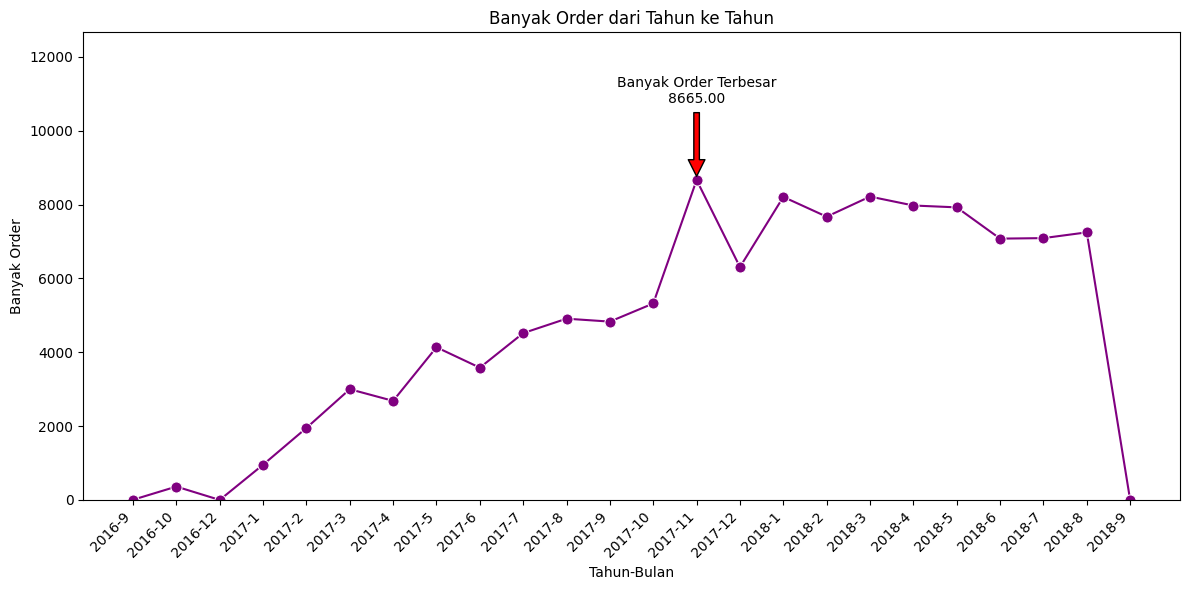

In [208]:
# Line Chart  Banyak Order dari Tahun ke Tahun
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='year_month', y='order_freq', data=summary_revenue_df, marker='o', markersize=8, errorbar=None, color='purple')

# mendapatkan index order_freq terbesar
max_order_index = summary_revenue_df['order_freq'].idxmax()

# Melakukan anotasi pada Banyak Order terbesar
max_order = summary_revenue_df.loc[max_order_index, 'order_freq']
max_year_month = summary_revenue_df.loc[max_order_index, 'year_month']

# Mengatur Posisi Anotasi
annotation_y_position = max_order + 2000
annotation_x_position = max_year_month

# Annotasi Pendaptan terbesar
ax.annotate(f'Banyak Order Terbesar\n{max_order:.2f}', xy=(max_year_month, max_order), xytext=(annotation_x_position, annotation_y_position),
            arrowprops=dict(facecolor='red', shrink=0.05),
            ha='center', va='bottom'
            )

# Set Label Chart
plt.title('Banyak Order dari Tahun ke Tahun')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Banyak Order')

plt.xticks(rotation=45, ha='right')

# Mengubah limit border chart
ax.set_ylim(0, max_order + 4000) 

plt.tight_layout()
plt.show()

Pada data Order tahun ke Tahun memilliki tren yang serupa dengan Pendapatan Terbesar sebelumnya dimana nilai maksimal terjadi pada `Tahun 2017 Bulan November` dan kemudian `fluktuatif diangka 6000-8000 order` sampai pada `Tahun 2018 Bulan Agustus`

### 2. Kategori Produk Yang Menghasilkan Pendapatan Terbesar

C:\Users\LUTHFI NOVRA\AppData\Local\Temp\ipykernel_13340\3150257916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product_category_name', data=top5_products, palette='viridis', ax=axes[0][0])
C:\Users\LUTHFI NOVRA\AppData\Local\Temp\ipykernel_13340\3150257916.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product_category_name', data=bottom5_products, palette='viridis', ax=axes[0][1], order=bottom5_products['product_category_name'][::-1])
C:\Users\LUTHFI NOVRA\AppData\Local\Temp\ipykernel_13340\3150257916.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hu

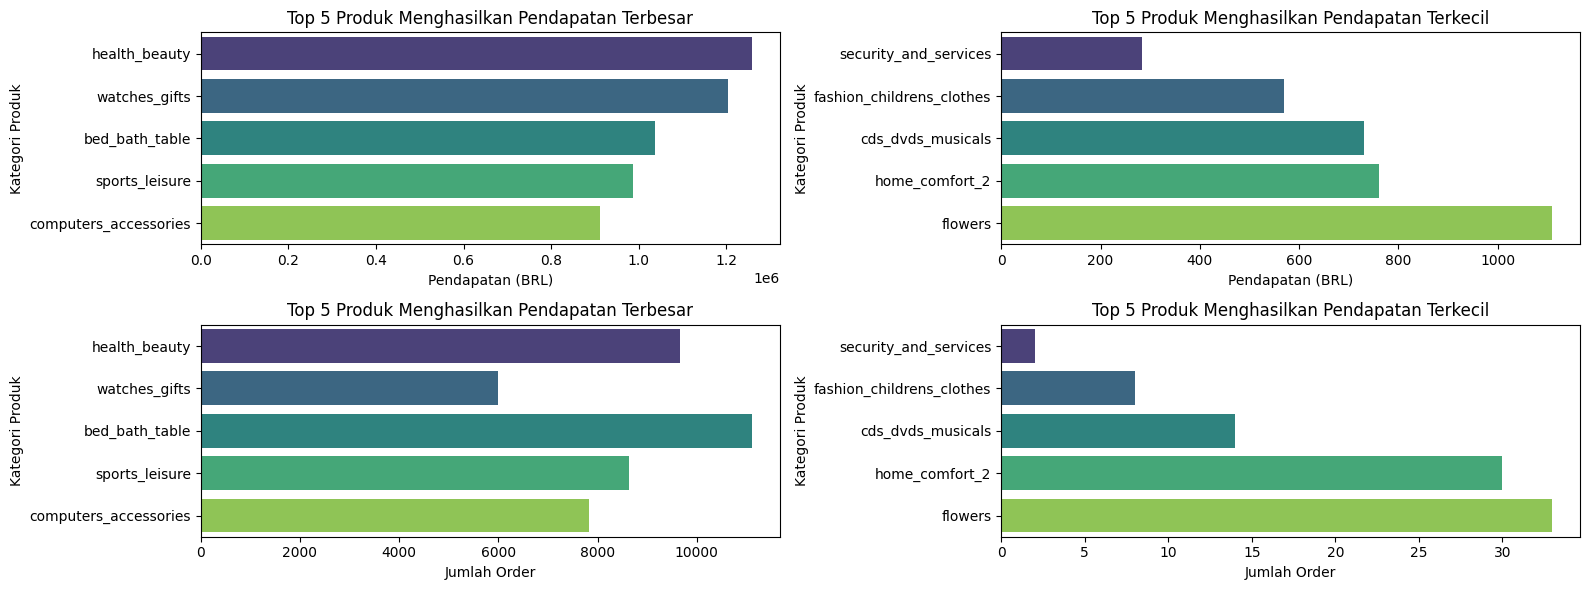

In [215]:
pendapatan_kategori_df_sorted = pendapatan_kategori_df.sort_values(by='revenue', ascending=False)

# Memilih Produk dengan Top 5 Pendapatan dan Bottom 5
top5_products = pendapatan_kategori_df_sorted.head(5)
bottom5_products = pendapatan_kategori_df_sorted.tail(5)

# Mangatur Dua kolom subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))

# Membuat Plot untuk Top 5 Produk dengan Revenue Terbesar
sns.barplot(x='revenue', y='product_category_name', data=top5_products, palette='viridis', ax=axes[0][0])
axes[0][0].set_title('Top 5 Produk Menghasilkan Pendapatan Terbesar')
axes[0][0].set_xlabel('Pendapatan (BRL)')
axes[0][0].set_ylabel('Kategori Produk')

# Membuat Plot untuk Top Bottom 5 Produk dengan pendapatan terendah
sns.barplot(x='revenue', y='product_category_name', data=bottom5_products, palette='viridis', ax=axes[0][1], order=bottom5_products['product_category_name'][::-1])
axes[0][1].set_title('Top 5 Produk Menghasilkan Pendapatan Terkecil')
axes[0][1].set_xlabel('Pendapatan (BRL)')
axes[0][1].set_ylabel('Kategori Produk')

# Membuat Plot Jumlah Order Top 5 Produk dengan pendapatan terbesar
sns.barplot(x='order_freq', y='product_category_name', data=top5_products, palette='viridis', ax=axes[1][0])
axes[1][0].set_title('Top 5 Produk Menghasilkan Pendapatan Terbesar')
axes[1][0].set_xlabel('Jumlah Order')
axes[1][0].set_ylabel('Kategori Produk')

# Membuat Plot Jumlah Order Top Bottom 5 Produk dengan pendapatan terendah
sns.barplot(x='order_freq', y='product_category_name', data=bottom5_products, palette='viridis', ax=axes[1][1], order=bottom5_products['product_category_name'][::-1])
axes[1][1].set_title('Top 5 Produk Menghasilkan Pendapatan Terkecil')
axes[1][1].set_xlabel('Jumlah Order')
axes[1][1].set_ylabel('Kategori Produk')

plt.tight_layout()
plt.show()

Berdasarkan chart Diatas terlihat:
- Produk dengan pendapatan terbesar merupakan produk dengan kategori `health_beauty`, `watches_gift`, `bed_bath_table`, `sports_leisure`, dan `computer_accessories`
- Produk dengan pendapatan terkecil merupakan produk dengan kategori `security_and_services`, `fashion_childrens_clothes`, `cds_dvds_musicals`, `home_comfort_2`, dan `flowers`

Ketika dilihat berdasarkan Jumlah order
- Kelima produk yang mengasilkan pendapatan terbesar tidak langsung berkorelasi antara jumlah order dengan pendapatannya. Terlihat bahwa `bed_bath_table` mendapat order terbanyak sedangkan hanya menempati urutan `ke-3` produk yang mendapatkan pendapatan terbesar.
- Sedangkan pada produk yang menghasilkan pendapatan terendah, `ke-5 produk langsung berkorelasi` antara `jumlah_order` dengan `pendapatan` dimana ke-5 produk memilki urutan pendapatan yang sesuai denga urutan jumlah order

### 3. Pendapatan Masing-masing Seller dari Hasil Penjualan

C:\Users\LUTHFI NOVRA\AppData\Local\Temp\ipykernel_13340\2497148805.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='seller_id', data=top5_seller, palette='viridis', ax=axes[0][0])
C:\Users\LUTHFI NOVRA\AppData\Local\Temp\ipykernel_13340\2497148805.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='seller_id', data=bottom5_seller, palette='viridis', ax=axes[0][1], order=bottom5_seller['seller_id'][::-1])
C:\Users\LUTHFI NOVRA\AppData\Local\Temp\ipykernel_13340\2497148805.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same eff

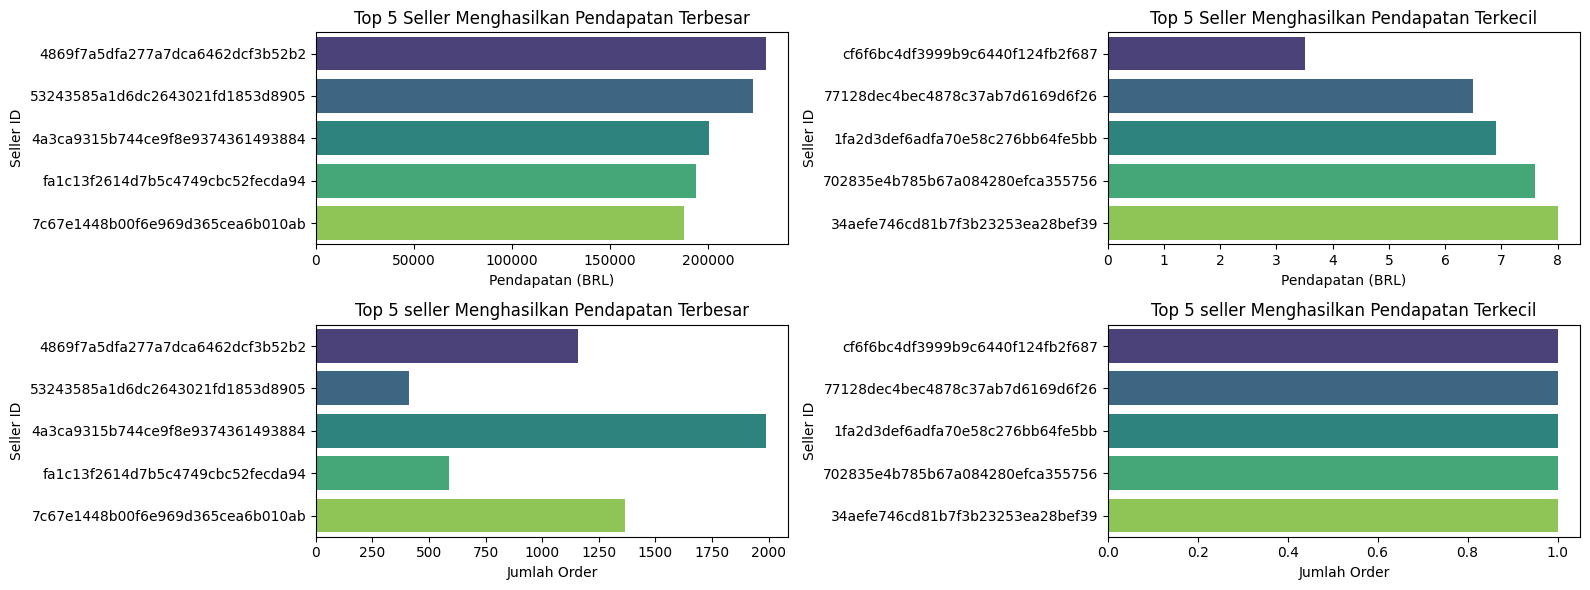

In [216]:
pendapatan_seller_df_sorted = pendapatan_seller_df.sort_values(by='revenue', ascending=False)

# Memilih Produk dengan Top 5 Pendapatan dan Bottom 5
top5_seller = pendapatan_seller_df_sorted.head(5)
bottom5_seller = pendapatan_seller_df_sorted.tail(5)

# Mangatur Dua kolom subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))

# Membuat Plot untuk Top 5 Seller dengan Revenue Terbesar
sns.barplot(x='revenue', y='seller_id', data=top5_seller, palette='viridis', ax=axes[0][0])
axes[0][0].set_title('Top 5 Seller Menghasilkan Pendapatan Terbesar')
axes[0][0].set_xlabel('Pendapatan (BRL)')
axes[0][0].set_ylabel('Seller ID')

# Membuat Plot untuk Top Bottom 5 Seller dengan pendapatan terendah
sns.barplot(x='revenue', y='seller_id', data=bottom5_seller, palette='viridis', ax=axes[0][1], order=bottom5_seller['seller_id'][::-1])
axes[0][1].set_title('Top 5 Seller Menghasilkan Pendapatan Terkecil')
axes[0][1].set_xlabel('Pendapatan (BRL)')
axes[0][1].set_ylabel('Seller ID')

# Membuat Plot Jumlah Order Top 5 Seller dengan pendapatan terbesar
sns.barplot(x='order_freq', y='seller_id', data=top5_seller, palette='viridis', ax=axes[1][0])
axes[1][0].set_title('Top 5 seller Menghasilkan Pendapatan Terbesar')
axes[1][0].set_xlabel('Jumlah Order')
axes[1][0].set_ylabel('Seller ID')

# Membuat Plot Jumlah Order Top Bottom 5 Seller dengan pendapatan terendah
sns.barplot(x='order_freq', y='seller_id', data=bottom5_seller, palette='viridis', ax=axes[1][1], order=bottom5_seller['seller_id'][::-1])
axes[1][1].set_title('Top 5 seller Menghasilkan Pendapatan Terkecil')
axes[1][1].set_xlabel('Jumlah Order')
axes[1][1].set_ylabel('Seller ID')

plt.tight_layout()
plt.show()

- Berdasarkan Chart tersebut terlihat bahwasanya seller dengan pendapatan terbesar yaitu seller `4869f7a5dfa277a7dca6462dcf3b52b2` dengan pendapatan hingga `200.000 (BRL)`
- Meskipun seller `4869f7a5dfa277a7dca6462dcf3b52b2` mendapatkan pendapatan terbesar, tetapi tidak berkorelasi lansung dengan jumlah order yang hanya sekitar `1000 order` jika dibandingkan dengan seller lain yang mendapatkan order hampir sebanyak `2000 order` 

- Untuk Seller dengan pendapatan `terendah` ke-5 seller hanya berhasil melakukan penjualan sebanyak `1 Order`
- ke-5 Seller dengan pendapatan `terendah` memiliki selisih yang cukup kecil dengan `ke-5 seller` menghasilkan pendapatan di range `3-8 (BRL)`